<a href="https://colab.research.google.com/github/RisyadFaisalH/Data-Mining/blob/main/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CASE STUDY 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

These are the rules for the dataset

01 date : Date in MM-DD-YYYY

02 day : Day of the Week

03 quarter : A portion of the month. A month was divided into four quarters

04 department : Associated department with the instance

05 team_no : Associated team number with the instance

06 no_of_workers : Number of workers in each team

07 no_of_style_change : Number of changes in the style of a particular product

08 targeted_productivity : Targeted productivity set by the Authority for each 
team for each day.

09 smv : Standard Minute Value, it is the allocated time for a task

10 wip : Work in progress. Includes the number of unfinished items for products

11 over_time : Represents the amount of overtime by each team in minutes

12 incentive : Represents the amount of financial incentive (in BDT) that 
enables or motivates a particular course of action.

13 idle_time : The amount of time when the production was interrupted due to 
several reasons

14 idle_men : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [ ]:
data = pd.read_csv('https://github.com/RisyadFaisalH/Data-Mining/blob/main/garments_worker_productivity.csv?raw=true')
display(data)
data.describe()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


STEP 1

Object and Attribute

In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of instances = 1197
Number of attributes = 15


Frequency of an Attribute

In [ ]:
data.quarter.value_counts() 

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [ ]:
data.department.value_counts() 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [ ]:
data.day.value_counts() 

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

 Statistical description of mean, median, mode, standard deviation.

In [ ]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Scatter Plot

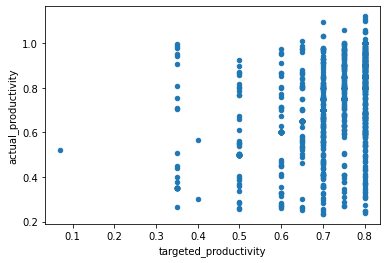

In [ ]:
data.plot.scatter('targeted_productivity', 'actual_productivity')

Histogram

In [ ]:
data.hist('actual_productivity')

Plot of Data

In [ ]:
data.boxplot('actual_productivity')

In [ ]:
data.boxplot('team')

STEP 3

Check For Duplicate Values

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Check Null Value, and replace with 0

In [ ]:
#Check is there any null value 
print(data.isnull().sum())
data['wip'] = data['wip'].fillna(0)
print("=================================")
#Check null value again
print(data.isnull().sum())


Normalization

In [ ]:
# copy the data
df_min_max_scaled = data.copy()
  
# apply normalization techniques by Column 1
column = 'actual_productivity'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
df_min_max_scaled.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.565431
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.196776
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.469817
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.608558
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.695303
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.000000


Scatter Plot After

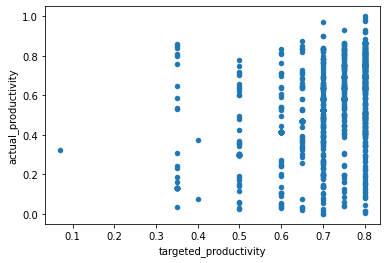

In [ ]:
df_min_max_scaled.plot.scatter('targeted_productivity', 'actual_productivity')

Histogram After

In [ ]:
df_min_max_scaled.hist('actual_productivity')

Remove Day and quarter coloumn

In [ ]:
display(df_min_max_scaled)

In [ ]:
df_min_max_scaled = df_min_max_scaled.drop(columns=['day','quarter'])
display(df_min_max_scaled)

Trim Wide Space (Case Folding)

In [ ]:
df_min_max_scaled.department.value_counts()

In [ ]:
# before replacing data, the finished department are split into finishing with a space, and without space
df_min_max_scaled=df_min_max_scaled.replace(['finishing '], ['finishing'])  
df_min_max_scaled.department.value_counts()